In [2]:
import os
import time
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [3]:
home = os.path.expanduser("~")
documents_path = os.path.join(home, "Documents")


In [4]:
train_df = pd.read_csv(os.path.join(documents_path, "train_df.csv"))
test_df = pd.read_csv(os.path.join(documents_path, "test_df.csv"))
val_df = pd.read_csv(os.path.join(documents_path, "val_df.csv"))


In [5]:
train_df.head()

,raw_ocr,label,data_set,ocr_tmp,raw_ocr_clean
0,"""i1AR-13-97 THU ]7t59 RKH PUBLIC RELATIONS FAX...",9,train,ar thu rkh public relations fax no thursday ma...,ar thu rkh public relations fax thursday march...
1,"Chaikin, Karen\nFrom: Chaikin, Karen\nSent: Tu...",2,train,chaikin karen from chaikin karen sent tuesday ...,chaikin karen chaikin karen sent tuesday novem...
2,"a\n`..~.:r'\n\npgNbr=1\n~ ~ Vt+~/`rr\n_.,\na\n...",3,train,vt rr zlle am ln oajl,vt rr zlle ln oajl
3,-4~&amp;4\n9~j~ 6~ 6/ 90 ~a\n33 39 /o\n3i-3y 3...,3,train,yl vo yo al xaue college aw yy qa cia ii aa as...,yl vo yo al xaue college aw yy qa cia ii aa iy...
4,&gt;----- Original Message-----\n&gt;From: Vio...,2,train,original message from viol brigitte sent monda...,original message viol brigitte sent monday dec...


In [5]:

train_df = train_df.drop(['raw_ocr', 'ocr_tmp'],axis=1)

In [3]:
train_df.head()

NameError: name 'train_df' is not defined

In [6]:
train_df = train_df.dropna(subset=['raw_ocr_clean'])
val_df = val_df.dropna(subset=['raw_ocr_clean'])


In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(max_features=5000)
X_train = vectorizer.fit_transform(train_df["raw_ocr_clean"])
X_val = vectorizer.transform(val_df["raw_ocr_clean"])


In [8]:
#encodage
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
y_train = encoder.fit_transform(train_df["label"])
y_val = encoder.transform(val_df["label"])


In [9]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report

# Modèle MLP léger (scikit-learn)
mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, random_state=42)

# Entraînement sans conversion
mlp.fit(X_train, y_train)

# Prédictions
y_pred = mlp.predict(X_val)

# Rapport de classification
print(classification_report(y_val, y_pred, target_names=encoder.classes_.astype(str)))




              precision    recall  f1-score   support

           0       0.77      0.74      0.75      2405
           1       0.77      0.75      0.76      2506
           2       0.92      0.92      0.92      2515
           3       0.65      0.68      0.67      2230
           4       0.76      0.77      0.76      2159
           5       0.73      0.75      0.74      2472
           6       0.85      0.87      0.86      2502
           7       0.90      0.91      0.91      2511
           8       0.65      0.66      0.65      1298
           9       0.80      0.81      0.80      2435
          10       0.83      0.84      0.83      2458
          11       0.85      0.87      0.86      2538
          12       0.77      0.76      0.76      2439
          13       0.90      0.88      0.89      2493
          14       0.97      0.97      0.97      2409
          15       0.79      0.74      0.76      2518

    accuracy                           0.81     37888
   macro avg       0.81   

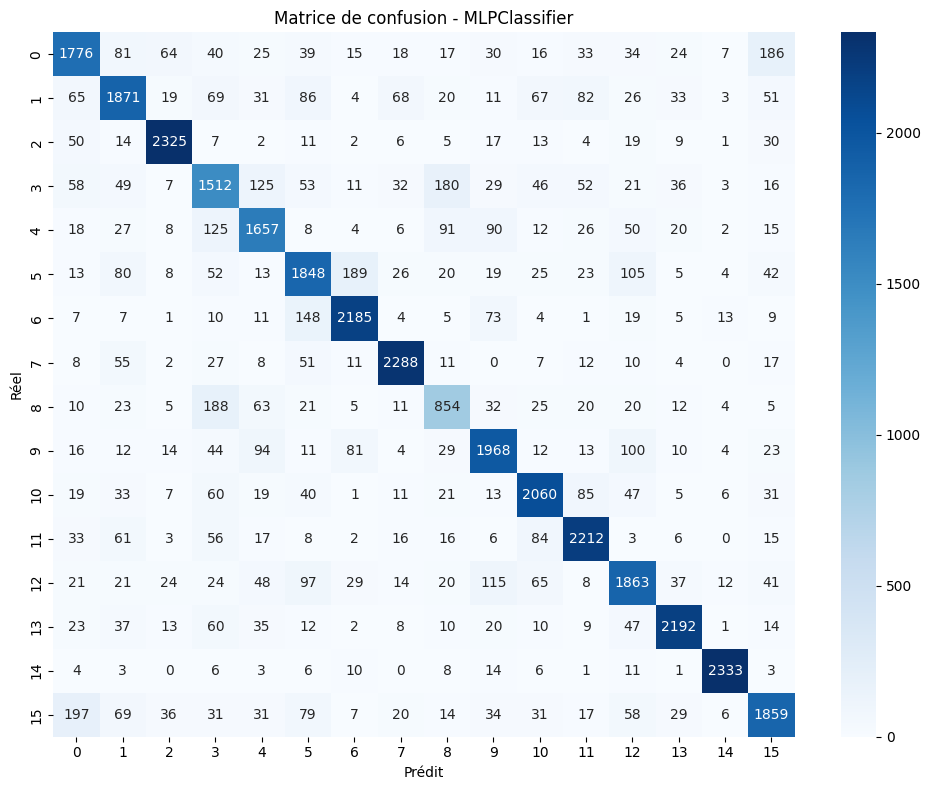

In [10]:
from sklearn.metrics import confusion_matrix
# Matrice de confusion
cm = confusion_matrix(y_val, y_pred)

# Création de la heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=encoder.classes_,
            yticklabels=encoder.classes_)

plt.xlabel("Prédit")
plt.ylabel("Réel")
plt.title("Matrice de confusion - MLPClassifier")
plt.tight_layout()
plt.show()

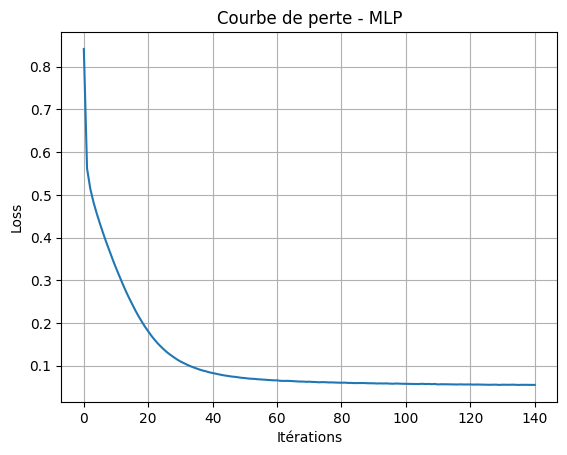

In [17]:
plt.plot(mlp.loss_curve_)
plt.title("Courbe de perte - MLP")
plt.xlabel("Itérations")
plt.ylabel("Loss")
plt.grid(True)
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'hidden_layer_sizes': [(100,), (128,), (100, 50), (128, 64)],
    'activation': ['relu', 'tanh'],
    'alpha': [0.0001, 0.001, 0.01],  # régularisation L2
    'learning_rate': ['constant', 'adaptive']
}

grid = GridSearchCV(MLPClassifier(max_iter=300, random_state=42), param_grid, cv=3, scoring='accuracy', verbose=2)
grid.fit(X_train, y_train)

print("Meilleurs paramètres :", grid.best_params_)


Fitting 3 folds for each of 48 candidates, totalling 144 fits
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate=constant; total time=21.0min
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate=constant; total time=25.4min
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate=constant; total time=24.9min
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate=adaptive; total time=25.5min
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate=adaptive; total time=24.8min
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate=adaptive; total time=39.7min
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(128,), learning_rate=constant; total time=99.7min
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(128,), learning_rate=constant; total time=23.4min
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes

/opt/anaconda3/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(100,), learning_rate=constant; total time=72.4min
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(100,), learning_rate=constant; total time=33.5min
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(100,), learning_rate=adaptive; total time=32.1min


/opt/anaconda3/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(100,), learning_rate=adaptive; total time=45.7min
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(100,), learning_rate=adaptive; total time=33.1min
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(128,), learning_rate=constant; total time=1718.6min
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(128,), learning_rate=constant; total time=2514.5min
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(128,), learning_rate=constant; total time=52.3min
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(128,), learning_rate=adaptive; total time=48.2min
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(128,), learning_rate=adaptive; total time=73.6min
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(128,), learning_rate=adaptive; total time=55.0min
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 50), learning_rate=constant; total time=49.5min
[CV] END activation=r

/opt/anaconda3/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate=constant; total time=37.5min
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate=adaptive; total time=29.4min
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate=adaptive; total time=31.3min


/opt/anaconda3/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate=adaptive; total time=35.9min
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(128,), learning_rate=constant; total time=45.1min
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(128,), learning_rate=constant; total time=48.3min
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(128,), learning_rate=constant; total time=48.8min
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(128,), learning_rate=adaptive; total time=47.0min
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(128,), learning_rate=adaptive; total time=59.7min
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(128,), learning_rate=adaptive; total time=76.2min


In [ ]:
print(classification_report(y_val, y_pred, target_names=encoder.classes_.astype(str)))
